In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Decision Tree

In [3]:
df=pd.read_csv(r'D:\Python\Class Practice\Machine learning\Dataset\diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
x=df.drop(['Outcome'],axis=1)
y=df[['Outcome']]

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
decision_tree=DecisionTreeClassifier()
train_data=decision_tree.fit(x_train,y_train)
train_data

DecisionTreeClassifier()

In [9]:
y_test_pred_dt=decision_tree.predict(x_test)

In [10]:
confusion_matrix(y_test,y_test_pred_dt)

array([[87, 20],
       [17, 30]], dtype=int64)

In [11]:
accuracy_score(y_test,y_test_pred_dt)

0.7597402597402597

In [12]:
# to ckeck the accuracy on train dataa
y_train_pred_dt=decision_tree.predict(x_train)

In [13]:
accuracy_score(y_train,y_train_pred_dt)

1.0

In [14]:
# overfitting problem reemove by hyperparameter
dt = DecisionTreeClassifier()
hyperparameter = {'criterion' : ['entropy','gini'], 'max_depth' : list(range(2,10,2)) }
hyperparameter
# clf = GridSearchCV( dt, hyperparameter , cv =5)
clf2 = RandomizedSearchCV( dt, hyperparameter , cv =5)

best_model = clf2.fit(x_train, y_train)

In [15]:
best_model.best_params_

{'max_depth': 2, 'criterion': 'gini'}

In [16]:
y_best_pred_dt=best_model.predict(x_test)

In [17]:
accuracy_score(y_test,y_best_pred_dt)

0.7597402597402597

In [18]:
y_best_train_pred_dt=best_model.predict(x_train)

In [19]:
accuracy_score(y_train,y_best_train_pred_dt)

0.7638436482084691

[Text(2325.8547794117644, 3669.2999999999997, 'X[1] <= 123.5\ngini = 0.461\nsamples = 614\nvalue = [393, 221]\nclass = Pregnancies'),
 Text(837.6838235294117, 3397.5, 'X[7] <= 28.5\ngini = 0.301\nsamples = 352\nvalue = [287, 65]\nclass = Pregnancies'),
 Text(300.88235294117646, 3125.7, 'X[5] <= 30.95\ngini = 0.162\nsamples = 202\nvalue = [184, 18]\nclass = Pregnancies'),
 Text(164.11764705882354, 2853.8999999999996, 'X[0] <= 7.0\ngini = 0.036\nsamples = 110\nvalue = [108, 2]\nclass = Pregnancies'),
 Text(109.41176470588235, 2582.0999999999995, 'X[6] <= 0.672\ngini = 0.018\nsamples = 109\nvalue = [108, 1]\nclass = Pregnancies'),
 Text(54.705882352941174, 2310.2999999999997, 'gini = 0.0\nsamples = 99\nvalue = [99, 0]\nclass = Pregnancies'),
 Text(164.11764705882354, 2310.2999999999997, 'X[6] <= 0.697\ngini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = Pregnancies'),
 Text(109.41176470588235, 2038.4999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Glucose'),
 Text(218.823529

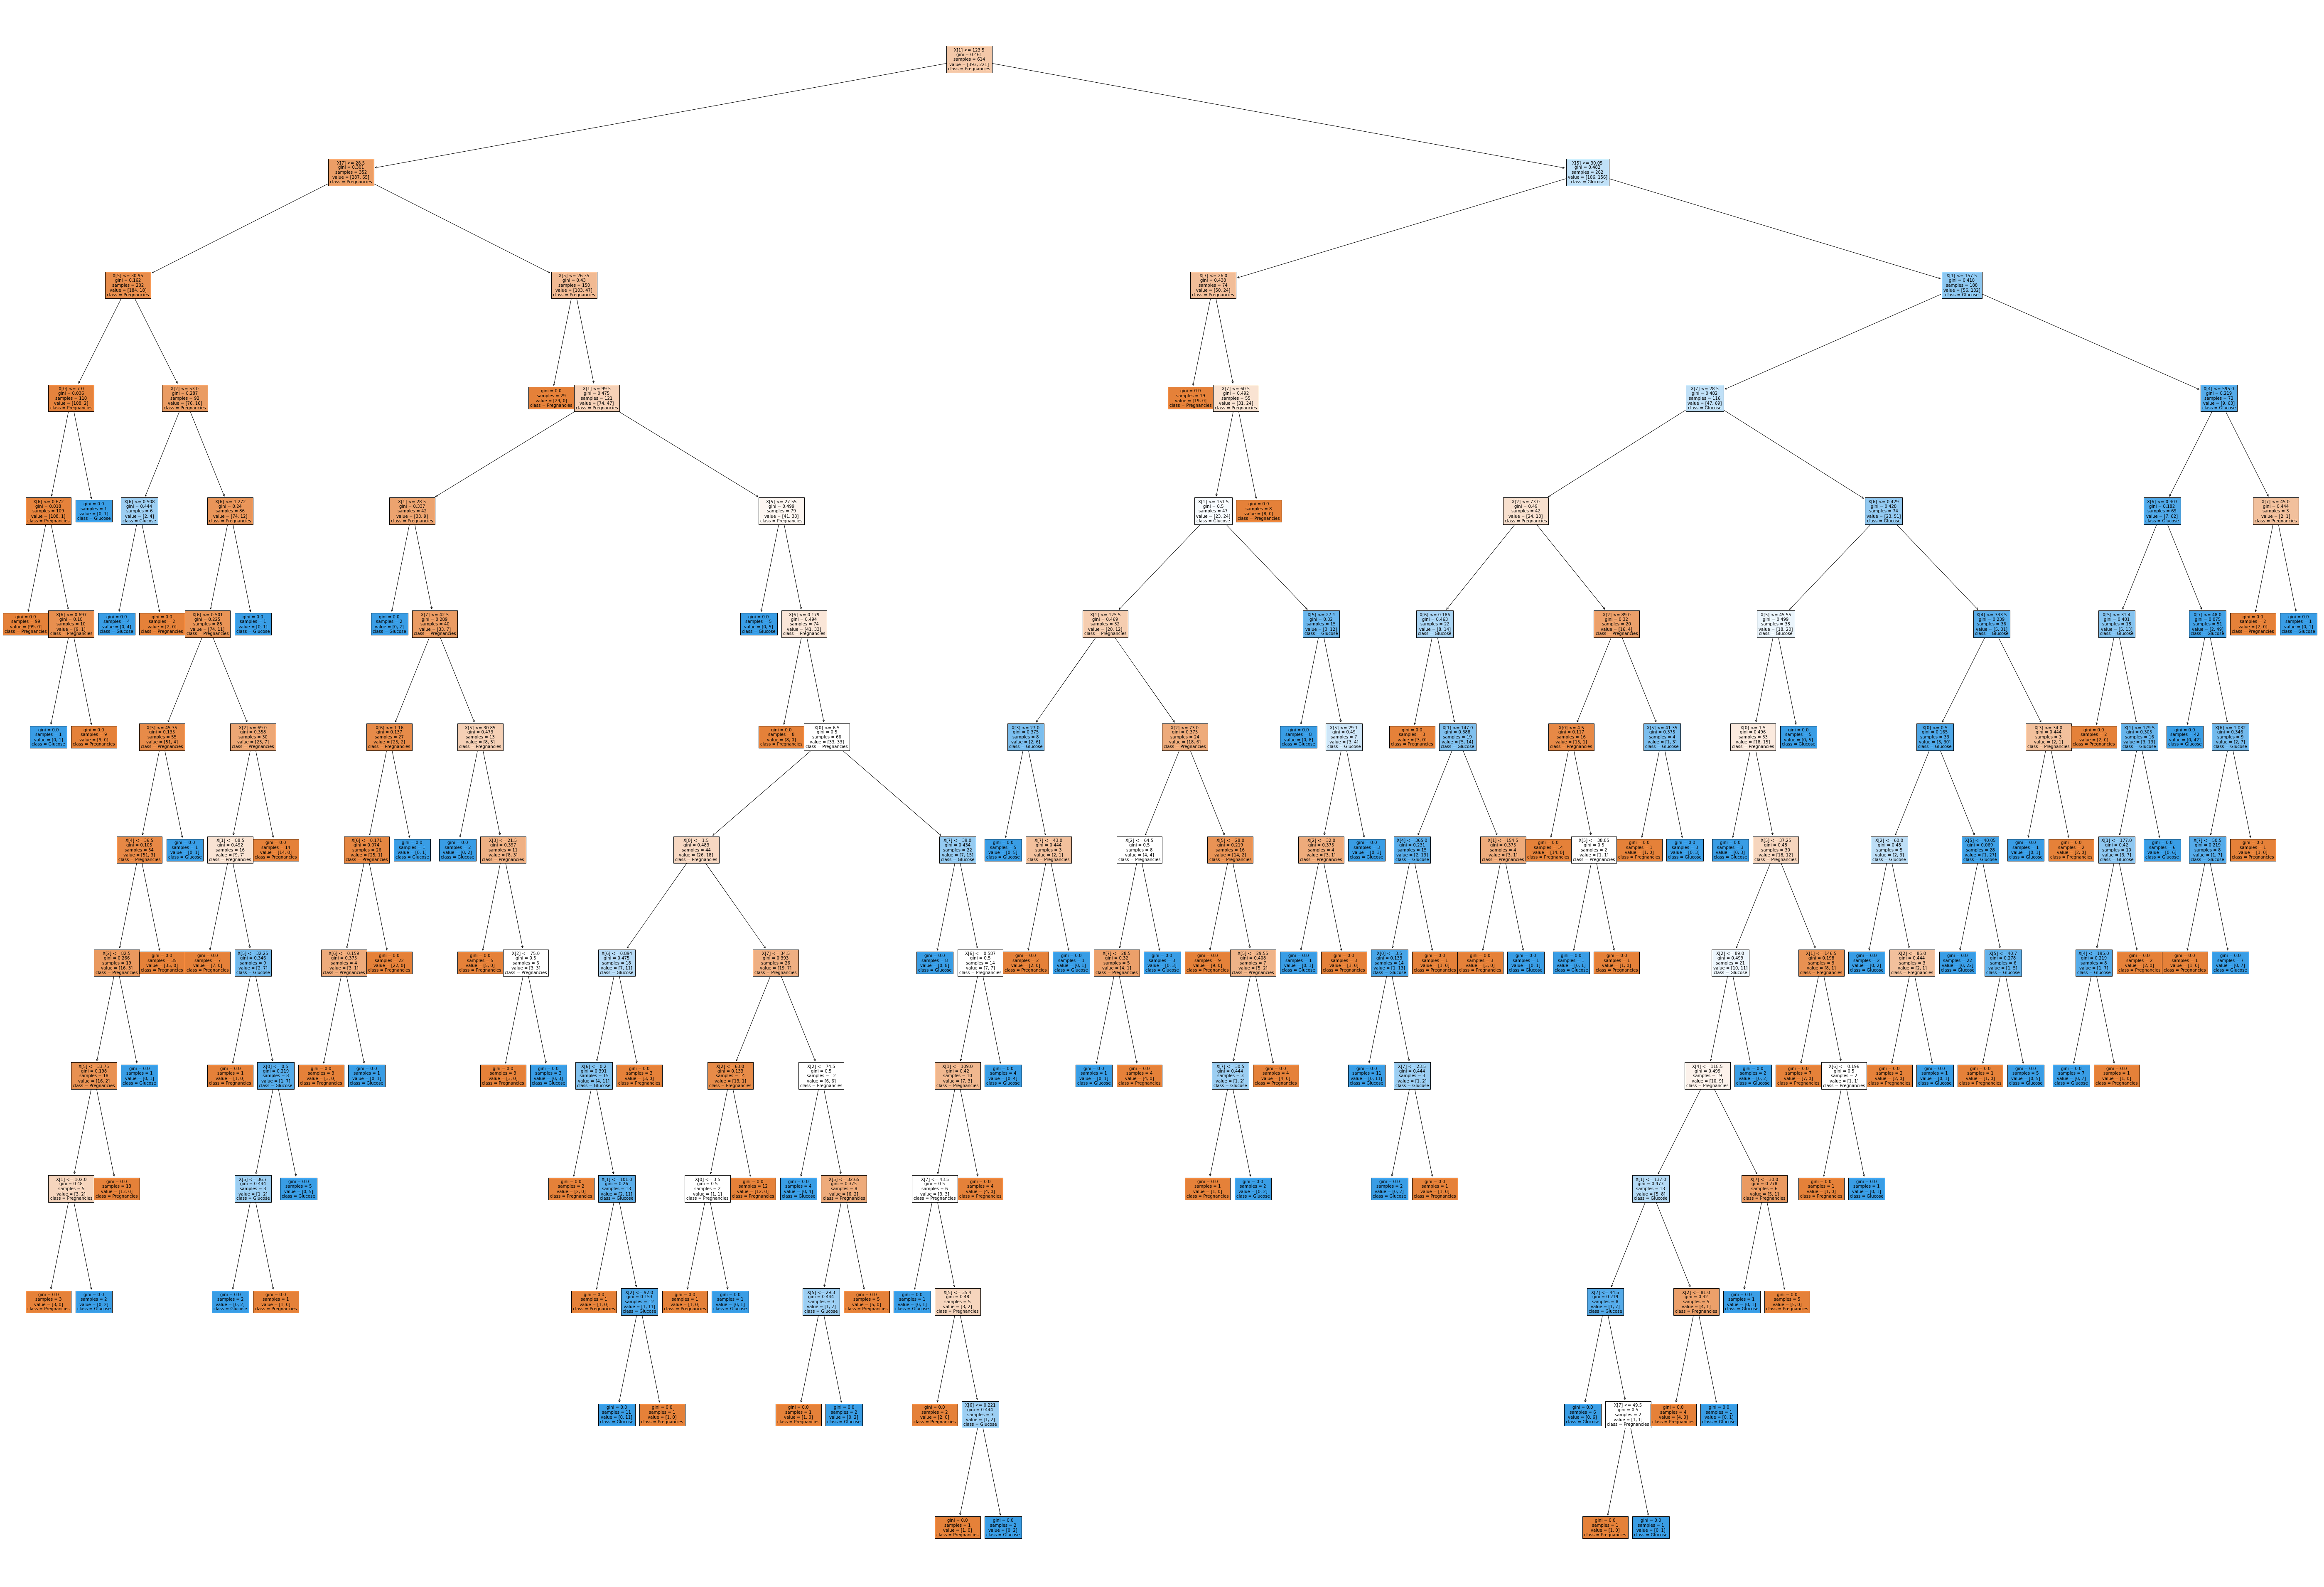

In [20]:
plt.figure(figsize=(100,70))
plot_tree(decision_tree,filled=True,class_names=x.columns)
# export_graphviz(best_model)

In [21]:
# find out probability
y_prob_tree=best_model.predict_proba(x_test)
y_prob_tree

array([[0.29787234, 0.70212766],
       [0.91089109, 0.08910891],
       [0.91089109, 0.08910891],
       [0.67567568, 0.32432432],
       [0.68666667, 0.31333333],
       [0.91089109, 0.08910891],
       [0.29787234, 0.70212766],
       [0.29787234, 0.70212766],
       [0.67567568, 0.32432432],
       [0.68666667, 0.31333333],
       [0.29787234, 0.70212766],
       [0.29787234, 0.70212766],
       [0.68666667, 0.31333333],
       [0.91089109, 0.08910891],
       [0.68666667, 0.31333333],
       [0.68666667, 0.31333333],
       [0.29787234, 0.70212766],
       [0.91089109, 0.08910891],
       [0.67567568, 0.32432432],
       [0.68666667, 0.31333333],
       [0.29787234, 0.70212766],
       [0.91089109, 0.08910891],
       [0.91089109, 0.08910891],
       [0.68666667, 0.31333333],
       [0.91089109, 0.08910891],
       [0.29787234, 0.70212766],
       [0.91089109, 0.08910891],
       [0.29787234, 0.70212766],
       [0.91089109, 0.08910891],
       [0.68666667, 0.31333333],
       [0.

In [22]:
fpr,tpr,threshold=roc_curve(y_test,y_prob_tree[:,1])

In [23]:
import pickle

In [132]:
pickle.dump(train_data,open('train_data.pickle','wb'))

In [133]:
five=x_test.head()

In [134]:
pickle.dump(five,open('five.pickle','wb'))

In [24]:
y_test.head()

,Outcome
661,1
122,0
113,0
14,1
529,0





# Apply KNN on diabities

<AxesSubplot:xlabel='Outcome', ylabel='count'>

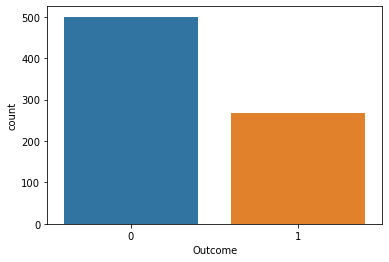

In [25]:
sns.countplot(x='Outcome',data=df)

In [26]:
# by using the scaling 
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [27]:
# normal_scale=MinMaxScaler()
# x_scaled=normal_scale.fit_transform(x)
# x=pd.DataFrame(x_scaled,columns=x.columns)
# x

In [28]:
std_scale=StandardScaler()
x_scaled=std_scale.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
y_test_pred_knn=knn_model.predict(x_test)

In [33]:
confusion_matrix(y_test,y_test_pred_knn)

array([[87, 20],
       [18, 29]], dtype=int64)

In [34]:
cls_knn=classification_report(y_test,y_test_pred_knn)
print(cls_knn)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       107
           1       0.59      0.62      0.60        47

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.75       154



In [35]:
accuracy_score(y_test,y_test_pred_knn)

0.7532467532467533

# cheak accuracy of on train data

In [36]:
y_train_pred_knn = knn_model.predict(x_train)
accuracy_score(y_train,y_train_pred_knn)

0.7850162866449512

In [37]:
# check the accuracy by using hyperparameter
n_neighbors = list(range(5,50))
p = [1,2]
hyperparameter =dict(n_neighbors=n_neighbors,p = p)
new_model=KNeighborsClassifier()
gscv=GridSearchCV(new_model,hyperparameter,cv=5)
# rscv=RandomizedSearchCV(new_model,hyperparameter,cv=5)

knn_new_model =gscv.fit(x_train,y_train)

In [38]:
y_best_test_pred_knn=knn_new_model.predict(x_test)

In [39]:
accuracy_score(y_test,y_best_test_pred_knn)

0.8051948051948052

In [40]:
knn_new_model.best_estimator_

KNeighborsClassifier(n_neighbors=36, p=1)

In [41]:
# findout probability on best accuracy model
y_prob_knn =knn_model.predict_proba(x_test)
y_prob_knn

array([[0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.6,

In [42]:
fpr1,tpr1,threshold1=roc_curve(y_test,y_prob_knn[:,1])

# apply Logistic on diabetes

In [43]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [44]:
x1=df.drop(['Outcome'],axis=1)
y1=df[['Outcome']]

In [45]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x1,y1,test_size=0.2,random_state=0)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train2,y_train2)

LogisticRegression()

In [48]:
y_pred_log=logistic_model.predict(x_test2)

In [49]:
confusion_matrix(y_test2,y_pred_log)

array([[98,  9],
       [18, 29]], dtype=int64)

In [50]:
cls_log = classification_report(y_test2,y_pred_log)
print(cls_log)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [51]:
accuracy_score(y_test2,y_pred_log)

0.8246753246753247

In [52]:
# to check accuracy on train data
y_train_pred_log=logistic_model.predict(x_train2)
accuracy_score(y_train2,y_train_pred_log)

0.7719869706840391

# Hyper parameter Tunning

In [53]:
random_state=list(range(1,100))
max_iter = list(range(100,200))
hyperparameter1=dict(random_state=random_state,max_iter=max_iter)

In [54]:
new_=LogisticRegression()
# gscv1=GridSearchCV(new_,hyperparameter1,cv=2)
rscv1=RandomizedSearchCV(new_ ,hyperparameter1, cv=5)
new_logistic_model=rscv1.fit(x_train2,y_train2)

In [55]:
new_logistic_model.best_estimator_

LogisticRegression(max_iter=144, random_state=41)

In [56]:
y_best_pred_log1=new_logistic_model.predict(x_test2)

In [57]:
accuracy_score(y_test2,y_best_pred_log1)

0.8246753246753247

In [58]:
y_pred_train_log=new_logistic_model.predict(x_train2)

In [59]:
accuracy_score(y_train2,y_pred_train_log)

0.7638436482084691

In [60]:
# to find out the probability
y_pred_prob_log=logistic_model.predict_proba(x_test2)
y_pred_prob_log

array([[0.03700834, 0.96299166],
       [0.82926704, 0.17073296],
       [0.89823174, 0.10176826],
       [0.37916144, 0.62083856],
       [0.87082399, 0.12917601],
       [0.96042464, 0.03957536],
       [0.25698616, 0.74301384],
       [0.15978235, 0.84021765],
       [0.61119709, 0.38880291],
       [0.65665428, 0.34334572],
       [0.42463074, 0.57536926],
       [0.04231811, 0.95768189],
       [0.72576234, 0.27423766],
       [0.82206747, 0.17793253],
       [0.8811662 , 0.1188338 ],
       [0.83673593, 0.16326407],
       [0.13817879, 0.86182121],
       [0.97119689, 0.02880311],
       [0.60433673, 0.39566327],
       [0.74267843, 0.25732157],
       [0.33503602, 0.66496398],
       [0.54839769, 0.45160231],
       [0.76704652, 0.23295348],
       [0.93918966, 0.06081034],
       [0.94671699, 0.05328301],
       [0.61985565, 0.38014435],
       [0.95171176, 0.04828824],
       [0.09369145, 0.90630855],
       [0.88159263, 0.11840737],
       [0.84861473, 0.15138527],
       [0.

In [61]:
fpr2,tpr2,threshold2=roc_curve(y_test2,y_pred_prob_log[:,1])

# plot roc_curve and find auc_roc_score for all

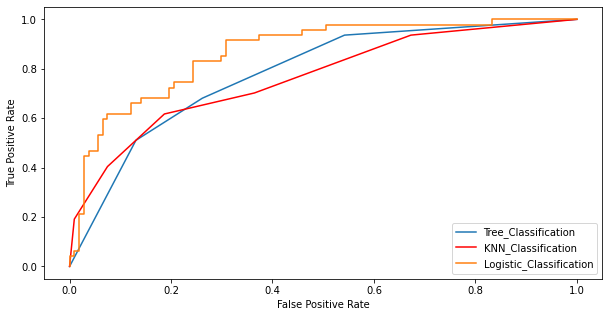

In [62]:
plt.figure(figsize=(10,5))

plt.plot(fpr,tpr,label="Tree_Classification")
plt.plot(fpr1,tpr1,color='red',label="KNN_Classification")
plt.plot(fpr2,tpr2,label="Logistic_Classification")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')


In [64]:
AUC_score_tree=roc_auc_score(y_test,y_prob_tree[:,1])
print("AUC Score for Tree :",AUC_score_tree)
print()
auc_score_knn=roc_auc_score(y_test,y_prob_knn[:,1])
print("AUC Score for KNN :",auc_score_knn)
print()
auc_score_logistic=roc_auc_score(y_test2,y_pred_prob_log[:,1])
print("AUC Score for logistic :",auc_score_logistic)

AUC Score for Tree : 0.7813680652217141

AUC Score for KNN : 0.7640684032610857

AUC Score for logistic : 0.8665738715450388


In [67]:
import numpy as np

In [77]:
def outcome_(Preg,Glu,BlPr,SkiTness,Insulin,BMI,DiabetesPedigreeFunction,Age):
    x=np.zeros(len(x_test2.columns))
    x[0]=Preg
    x[1]=Glu
    x[2]=BlPr
    x[3]=SkiTness
    x[4]=Insulin
    x[5]=float(BMI)
    x[6]=float(DiabetesPedigreeFunction)
    x[7]=Age
    return logistic_model.predict([x])[0]
    

In [78]:
pred=outcome_(8,183,64,0,0,23.3,0.672,32)  #row=1
pred

1

In [71]:
import pickle
pickle.dump(logistic_model,open('Logistic_model.pickle','wb'))


In [76]:
import json
colum={'columns_name':[i.lower() for i in x_test2.columns]}
column_json=json.dump((colum),open('Name_of_column.json','w'))
column_json